# Import all Important Packages

In [3]:
!pip install scikit-learn


     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.9 kB ? eta -:--:--
     ------------------------------- ------ 51.2/60.9 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 544.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.7 MB 6.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/10.7 MB 9.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/10.7 MB 7.3 MB/s eta 0:00:02
   ---- ----------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\sayan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install pandas scikit-learn matplotlib seaborn


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/109.0 kB ? eta -:--:--
     ----------------------------------- -- 102.4/109.0 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 109.0/109.0 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.3 MB 1.7 MB/s eta 0:00:07
   ---------------------------------------- 0.1/11.3 MB 2.4 MB/s eta 0:00:05
    --------------------------------------- 0.1/11.3 MB 1.4 MB/s eta 0:00:08
    --------------------------------------- 0.3/11.3 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.4/11.3 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.6/11.3 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/11.3 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/11.3 MB 2.3 MB/s eta 0:00:05
   --- ----------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\sayan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 - Data collection

In [7]:
boston_data = pd.read_csv("./HousingData.csv")

# Check whether read_csv is successful or not
# Check data format loaded through read_csv
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Step 2 - Data wrangling

In [9]:
# Input or independent value
X = boston_data.iloc[:, :13]

# Output or dependent value
Y = boston_data["MEDV"]

# Step 3 - Data Analysis

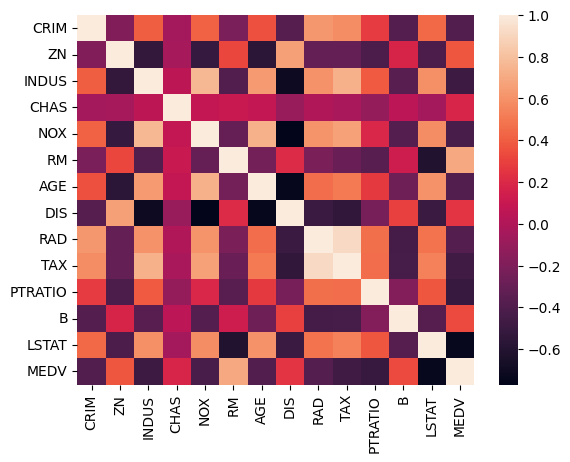

In [10]:
# Find correlation between all available columns
corr = boston_data.corr()
# Find correlated data columns using heatmaps
sns.heatmap(corr)
plt.show()

# Columns which are having correlation +ve and above 0.9 are highly correlated to each other
# We can drop any of them since it will not impact on output

#Right now I am not dropping any column and trying to predict the output with all input data

In [13]:
from sklearn.impute import SimpleImputer

# Create an imputer object to replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit on the entire feature data (X) and transform it
X_imputed = imputer.fit_transform(X)


# Step 4 - Splitting train test data

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_imputed, Y, test_size=0.2, random_state=42)


# Step 5 - Model Instantiation and training the model

In [15]:
# model instantiation
linear_model = LinearRegression()

# fit the model with input and corresponding output data
linear_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Step 6 - Testing the model

In [16]:
predicted_house_price = linear_model.predict(x_test)
print("Predicted House Prices")
print(predicted_house_price)

Predicted House Prices
[ 2.91432496e+01  3.65356675e+01  1.44925129e+01  2.50811104e+01
  1.84560923e+01  2.30104937e+01  1.81386861e+01  1.46265167e+01
  2.21158938e+01  2.08706364e+01  2.50758640e+01  1.87470982e+01
 -5.67498472e+00  2.17286655e+01  1.90464014e+01  2.54293420e+01
  1.96620047e+01  6.12420178e+00  4.09972355e+01  1.72352716e+01
  2.48905259e+01  3.02961849e+01  1.18008779e+01  2.29655895e+01
  1.73451595e+01  1.51051621e+01  2.10901065e+01  1.44883316e+01
  2.30923960e+01  1.94365043e+01  2.25439953e+01  2.52375663e+01
  2.59309510e+01  1.66289054e+01  1.64513986e+01  1.66143478e+01
  3.11105960e+01  2.02837991e+01  2.43569451e+01  2.26326769e+01
  1.45257750e+01  3.23698301e+01  4.30428488e+01  1.76390763e+01
  2.76326197e+01  1.64305143e+01  1.42484248e+01  2.61635938e+01
  1.97678160e+01  3.01463483e+01  2.09688785e+01  3.38338873e+01
  1.64161397e+01  2.63964842e+01  3.97974153e+01  2.20563187e+01
  1.86348862e+01  3.28326904e+01  2.54125467e+01  1.30089663e+01
  

In [17]:
predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices": predicted_house_price, "Actual_Prices": y_test})
print("Predicted and Actual Price Data frame")
print(predicted_dataframe)

Predicted and Actual Price Data frame
     Predicted_Prices  Actual_Prices
173         29.143250           23.6
274         36.535668           32.4
491         14.492513           13.6
72          25.081110           22.8
452         18.456092           16.1
..                ...            ...
412          0.028734           17.9
436         13.537938            9.6
411         16.097139           17.2
86          22.795804           22.5
75          24.380823           21.4

[102 rows x 2 columns]


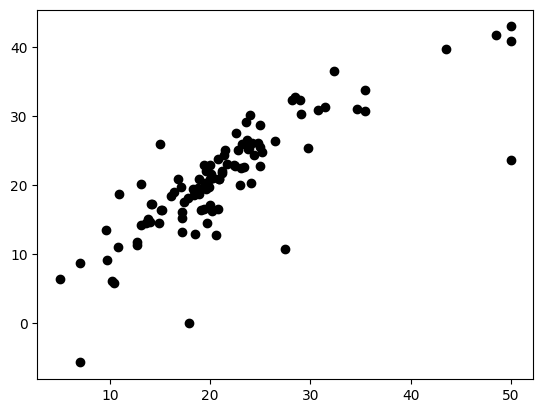

In [18]:
plt.scatter(y_test, predicted_house_price, color='black')
plt.show()